# <center> <span style="color:green ; font-size:50px; font-weight:bold;" >Projet De Data Science Groupe |||</span> 

#  |) Définition du problèmme 

Exploration des données financières ou (prêts) appartir d'un jeu de données collecté sur la plateforme UCI pour identifier des relations ou tendances à travers les test statistiques et faire  <span style="color:green; font-weight:bold;"> Le machine learning </span>pour évaluer (prédire) si un prêt sera remboursé à temps ou non en fonction des caractéristiques du prêt et de l'emprunteur.

# ||) <a id="section">Objectifs</a>

## <span> <a>[1) Description des données(ou variables) utilisées dans ce jeu de données](#section1) </a></span>
## <span> <a>[2) Vérification des types de données](#section2)</span> 
## <span> <a>[3) Détection  et traitements des valeurs manquantes](#section3)</a> </span>
## <span> <a>[4) Détection et traitement des valeurs de valeurs aberrantes et atypiques](#section4)</a> </span>
## <span> <a>[5) Analyse exploratoire des données du dataset](#section5) </span>
## <span><a> [6) Selection des variables pour la prédiction de la variable cible](#section6)</a></span>
## <span> <a>[7) Division du jeu de données en données d'entrenements et de tests](#section7) </span>
## <span> <a>[8) Création et entrainement du modèle pour faire la prédiction](#section8) </span>
## <span> <a>[9) Evaluation de la performance du modèle](#section9)</a> </span>
## <span> <a>[10) Exportation du modèle pour la mise en production](#section10) </span>

In [6]:
# importation des librairies ou packages à utiliser 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

import warnings 
warnings.filterwarnings('ignore')

In [8]:
# Chargement des données du dataset 
df = pd.read_csv("german.data", delim_whitespace=True, header=None)

In [10]:
# Affichages des cinq premières lignes 
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


In [12]:
# Affichage des cinq dernières lignes 
df.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
990,A14,12,A34,A46,3565,A65,A72,2,A93,A101,...,A122,37,A143,A152,2,A172,2,A191,A201,1
991,A14,15,A31,A43,1569,A62,A75,4,A93,A101,...,A123,34,A141,A152,1,A172,2,A191,A201,1
992,A11,18,A32,A43,1936,A65,A74,2,A94,A101,...,A123,23,A143,A151,2,A172,1,A191,A201,1
993,A11,36,A32,A42,3959,A61,A71,4,A93,A101,...,A122,30,A143,A152,1,A174,1,A192,A201,1
994,A14,12,A32,A40,2390,A65,A75,4,A93,A101,...,A123,50,A143,A152,1,A173,1,A192,A201,1
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2
999,A12,45,A34,A41,4576,A62,A71,3,A93,A101,...,A123,27,A143,A152,1,A173,1,A191,A201,1


In [14]:
# Noms explicites des colonnes
column_names = [
    "checking_account_status", "duration_months", "credit_history",
    "purpose", "credit_amount", "savings_account", "employment_duration",
    "installment_rate", "personal_status_sex", "other_debtors",
    "present_residence_years", "property", "age_years", "other_installment_plans",
    "housing", "number_of_credits", "job", "dependents",
    "telephone", "foreign_worker", "classification"
]

# Renommer les colonnes
df.columns = column_names[:len(df.columns)]

In [16]:
# Dimension du jeu de données 
df.shape 

(1000, 21)

In [18]:
# Information de la base de données 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   checking_account_status  1000 non-null   object
 1   duration_months          1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   credit_amount            1000 non-null   int64 
 5   savings_account          1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence_years  1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age_years                1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

# <center> <span> 1) <a id="section1">Description des données(ou variables) utilisées dans ce jeu de données </a></span>

In [21]:

# Description des colonnes
data_description = {
    "Nom de la colonne": [
        "checking_account_status", "duration_months", "credit_history", "purpose",
        "credit_amount", "savings_account", "employment_duration", "installment_rate",
        "personal_status_sex", "other_debtors", "present_residence_years", "property",
        "age_years", "other_installment_plans", "housing", "number_of_credits",
        "job", "dependents", "telephone", "foreign_worker", "classification"
    ],
    "Description": [
        "Statut du compte courant.",
        "Durée du crédit en mois.",
        "Historique de crédit (délai, crédits existants, etc.).",
        "Objectif du crédit (voiture, équipement, etc.).",
        "Montant du crédit en DM (Deutsche Marks).",
        "Épargne ou obligations (montant disponible).",
        "Durée d'emploi actuelle.",
        "Taux des mensualités (% du revenu disponible).",
        "État civil et sexe du demandeur.",
        "Autres débiteurs ou garants.",
        "Durée de résidence actuelle (en années).",
        "Type de bien détenu (immobilier, véhicule, etc.).",
        "Âge du demandeur en années.",
        "Autres plans de paiement (banque, magasin, aucun).",
        "Statut de logement (location, propriétaire, logement gratuit).",
        "Nombre de crédits existants à la banque.",
        "Type d’emploi (non qualifié, qualifié, cadre, etc.).",
        "Nombre de personnes à charge.",
        "Téléphone enregistré au nom du client (oui ou non).",
        "Le demandeur est-il un travailleur étranger ? (oui ou non).",
        "Classe cible : 1 = Bon client, 2 = Mauvais client."
    ]
}

# Création du DataFrame
description_df = pd.DataFrame(data_description)

# Affichage du tableau dans un format joli
from IPython.display import display
display(description_df.style.set_caption("Description des Colonnes du Dataset German Credit").set_properties(**{
    'text-align': 'left'
}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'center')]
}]))

,Nom de la colonne,Description
0,checking_account_status,Statut du compte courant.
1,duration_months,Durée du crédit en mois.
2,credit_history,"Historique de crédit (délai, crédits existants, etc.)."
3,purpose,"Objectif du crédit (voiture, équipement, etc.)."
4,credit_amount,Montant du crédit en DM (Deutsche Marks).
5,savings_account,Épargne ou obligations (montant disponible).
6,employment_duration,Durée d'emploi actuelle.
7,installment_rate,Taux des mensualités (% du revenu disponible).
8,personal_status_sex,État civil et sexe du demandeur.
9,other_debtors,Autres débiteurs ou garants.


In [23]:
df.head()

,checking_account_status,duration_months,credit_history,purpose,credit_amount,savings_account,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age_years,other_installment_plans,housing,number_of_credits,job,dependents,telephone,foreign_worker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


<span style="color:blue;"><a>[retour à la section description](#section)</a></span>

# <center> <span><a id="section2"> 2) Vérification des types de données</span> 

In [27]:
# verification 
df.dtypes 

checking_account_status    object
duration_months             int64
credit_history             object
purpose                    object
credit_amount               int64
savings_account            object
employment_duration        object
installment_rate            int64
personal_status_sex        object
other_debtors              object
present_residence_years     int64
property                   object
age_years                   int64
other_installment_plans    object
housing                    object
number_of_credits           int64
job                        object
dependents                  int64
telephone                  object
foreign_worker             object
classification              int64
dtype: object

In [29]:
# Convertir la colonne 'classification' en type catégoriel
df['classification'] = pd.Categorical(df['classification'], categories=[1, 2], ordered=True)

<span style="color:blue;"><a>[retour à la section Vérification des types de données](#section)</a></span>

# <center> <span> <a id="section3"> 3) Détection et traitements des valeurs manquantes </a> </span>

In [34]:
# Détection des valeurs manquantes 
df.isnull().sum()

checking_account_status    0
duration_months            0
credit_history             0
purpose                    0
credit_amount              0
savings_account            0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence_years    0
property                   0
age_years                  0
other_installment_plans    0
housing                    0
number_of_credits          0
job                        0
dependents                 0
telephone                  0
foreign_worker             0
classification             0
dtype: int64

<a>[Aller à la section valeurs manquantes](#section)</a>

# <center> <span> <a id="section4"> 4) Détection et traitement des valeurs  aberrantes et atypiques</a> </span>

In [38]:
# Description de jeu de données 
df.describe()

,duration_months,credit_amount,installment_rate,present_residence_years,age_years,number_of_credits,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


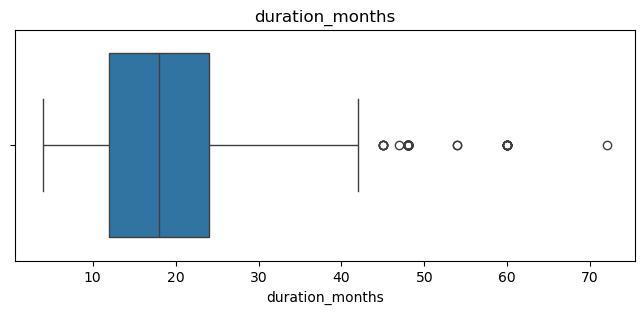

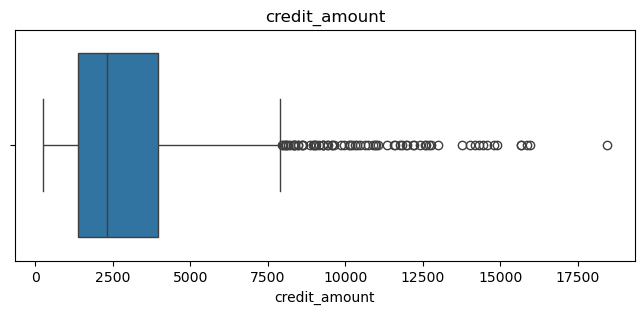

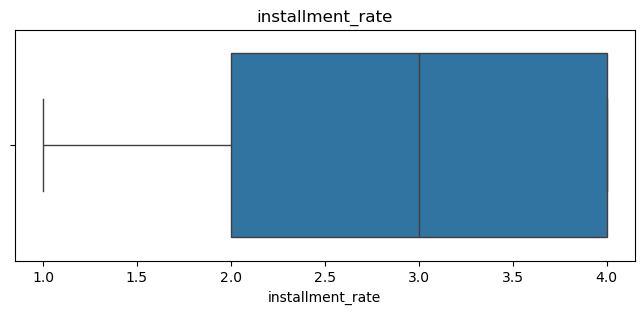

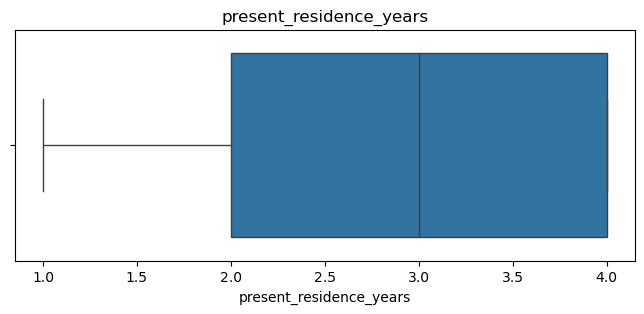

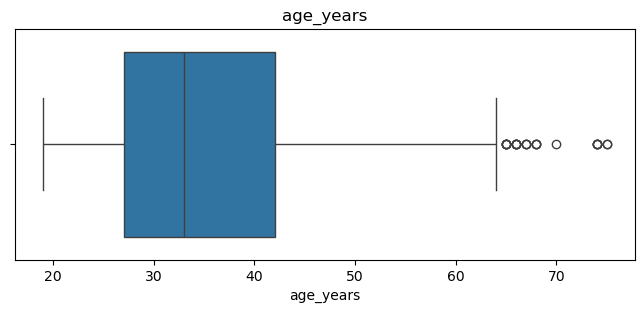

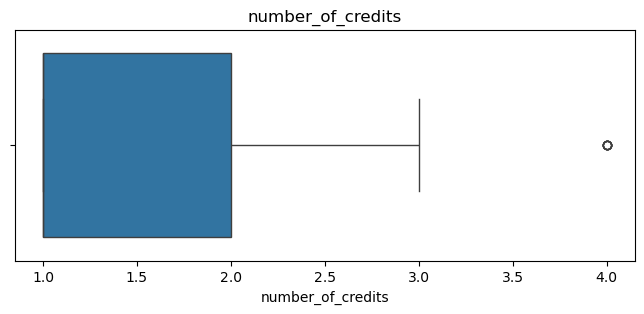

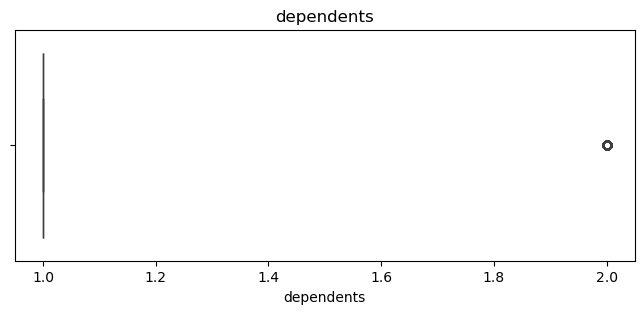

In [40]:
# Tracer des boxplots pour chaque variables 
for column in df.select_dtypes(include=['number']).columns:
    fig, axs=plt.subplots(figsize=(8,3))
    sns.boxplot(x=df[column], ax=axs)
    plt.title(column)
    plt.show();

In [41]:
# Dictionnaire pour stocker les valeurs aberrantes
outliers = {}

# Boucle sur toutes les colonnes numériques pour détecter les valeurs aberrantes
for col in df.select_dtypes(include=['number']).columns:
    # Calcul des quartiles Q1 et Q3
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    # Calcul de l'IQR
    IQR = Q3 - Q1
    
    # Définir les bornes pour les valeurs aberrantes
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Détecter les valeurs aberrantes
    outliers[col] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers': df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].tolist()
    }
    
   
# Afficher les valeurs aberrantes détectées
print("Valeurs aberrantes détectées :")
print(outliers)


Valeurs aberrantes détectées :
{'duration_months': {'lower_bound': -6.0, 'upper_bound': 42.0, 'outliers': [48, 48, 60, 45, 48, 48, 48, 54, 54, 48, 48, 60, 48, 48, 45, 48, 48, 60, 48, 48, 47, 48, 48, 48, 48, 48, 48, 60, 48, 60, 60, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 60, 48, 60, 48, 48, 48, 60, 72, 60, 48, 48, 60, 48, 48, 48, 48, 48, 48, 45, 48, 48, 48, 48, 60, 48, 60, 48, 45, 45]}, 'credit_amount': {'lower_bound': -2544.625, 'upper_bound': 7882.375, 'outliers': [9055, 8072, 12579, 9566, 14421, 8133, 9436, 12612, 15945, 11938, 8487, 10144, 8613, 9572, 10623, 10961, 14555, 8978, 12169, 11998, 10722, 9398, 9960, 10127, 11590, 13756, 14782, 14318, 12976, 11760, 8648, 8471, 11328, 11054, 8318, 9034, 8588, 7966, 8858, 12389, 12204, 9157, 15653, 7980, 8086, 10222, 10366, 9857, 14027, 11560, 14179, 12680, 8065, 9271, 9283, 9629, 15857, 8335, 11816, 10875, 9277, 15672, 8947, 10477, 18424, 14896, 12749, 10297, 8358, 10974, 8386, 8229]}, 'installment_rate': {'lower_bound': -1.0, 'upper_bound'

In [44]:
df.head()

,checking_account_status,duration_months,credit_history,purpose,credit_amount,savings_account,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age_years,other_installment_plans,housing,number_of_credits,job,dependents,telephone,foreign_worker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [46]:
from xgboost import XGBRegressor
from sklearn.ensemble import IsolationForest

# Isolation Forest : détection des valeurs aberrantes
X = df.loc[:, ['duration_months', 'credit_amount', 'age_years', 'number_of_credits', 'dependents']]

iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X)
df['outlier_label'] = iso_forest.predict(X)  # Ajouter les labels (-1: outlier, 1: normal)

# Préparer les données pour XGBoost
columns_to_correct = ['duration_months', 'credit_amount', 'age_years', 'number_of_credits', 'dependents']

for col in columns_to_correct:
    # Diviser en données normales (label 1) et aberrantes (label -1)
    normal_data = df[df['outlier_label'] == 1]
    outlier_data = df[df['outlier_label'] == -1]
    
    # Définir X (les autres colonnes) et y (la colonne cible à corriger)
    X_train = normal_data[columns_to_correct].drop(columns=[col])
    y_train = normal_data[col]
    X_outliers = outlier_data[columns_to_correct].drop(columns=[col])
    
    # Entraîner le modèle XGBoost
    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Prédire les valeurs des outliers
    corrected_values = model.predict(X_outliers)
    
    # Remplacer les valeurs aberrantes dans la colonne cible
    df.loc[outlier_data.index, col] = corrected_values

# Supprimer la colonne des labels d'anomalie après correction
df.drop(columns=['outlier_label'], inplace=True)


In [47]:
df.describe()

,duration_months,credit_amount,installment_rate,present_residence_years,age_years,number_of_credits,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,19.800679,2854.138536,2.973000,2.845000,34.827402,1.372669,1.119993
std,10.233881,2123.360582,1.118715,1.103718,10.288614,0.496047,0.311915
min,4.000000,250.000000,1.000000,1.000000,19.000000,0.864210,0.849863
25%,12.000000,1345.750000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2239.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3617.750000,4.000000,4.000000,40.000000,2.000000,1.000000
max,60.000000,12680.000000,4.000000,4.000000,74.000000,3.000000,2.287969


In [50]:
# Nettoyer les colonnes 'number_of_credits', 'present_residence_years', 'duration_months','age_years','dependents' en arrondissant les valeurs flottantes
colonnes=['present_residence_years','duration_months','age_years','dependents','number_of_credits']

for col in colonnes:
    df[col] = df[col].round().astype(int)

In [52]:
df.shape

(1000, 21)

<a> [Aller à la section gestion valeurs aberantes](#section)</a>

# <center><span> <a id="section5">5) Analyse exploratoire des données du dataset</a> </span>

In [56]:
# Détection des doublons 
df.duplicated().sum()

0

In [58]:
#Affichage du nom des colonnes du dataset 
df.columns

Index(['checking_account_status', 'duration_months', 'credit_history',
       'purpose', 'credit_amount', 'savings_account', 'employment_duration',
       'installment_rate', 'personal_status_sex', 'other_debtors',
       'present_residence_years', 'property', 'age_years',
       'other_installment_plans', 'housing', 'number_of_credits', 'job',
       'dependents', 'telephone', 'foreign_worker', 'classification'],
      dtype='object')

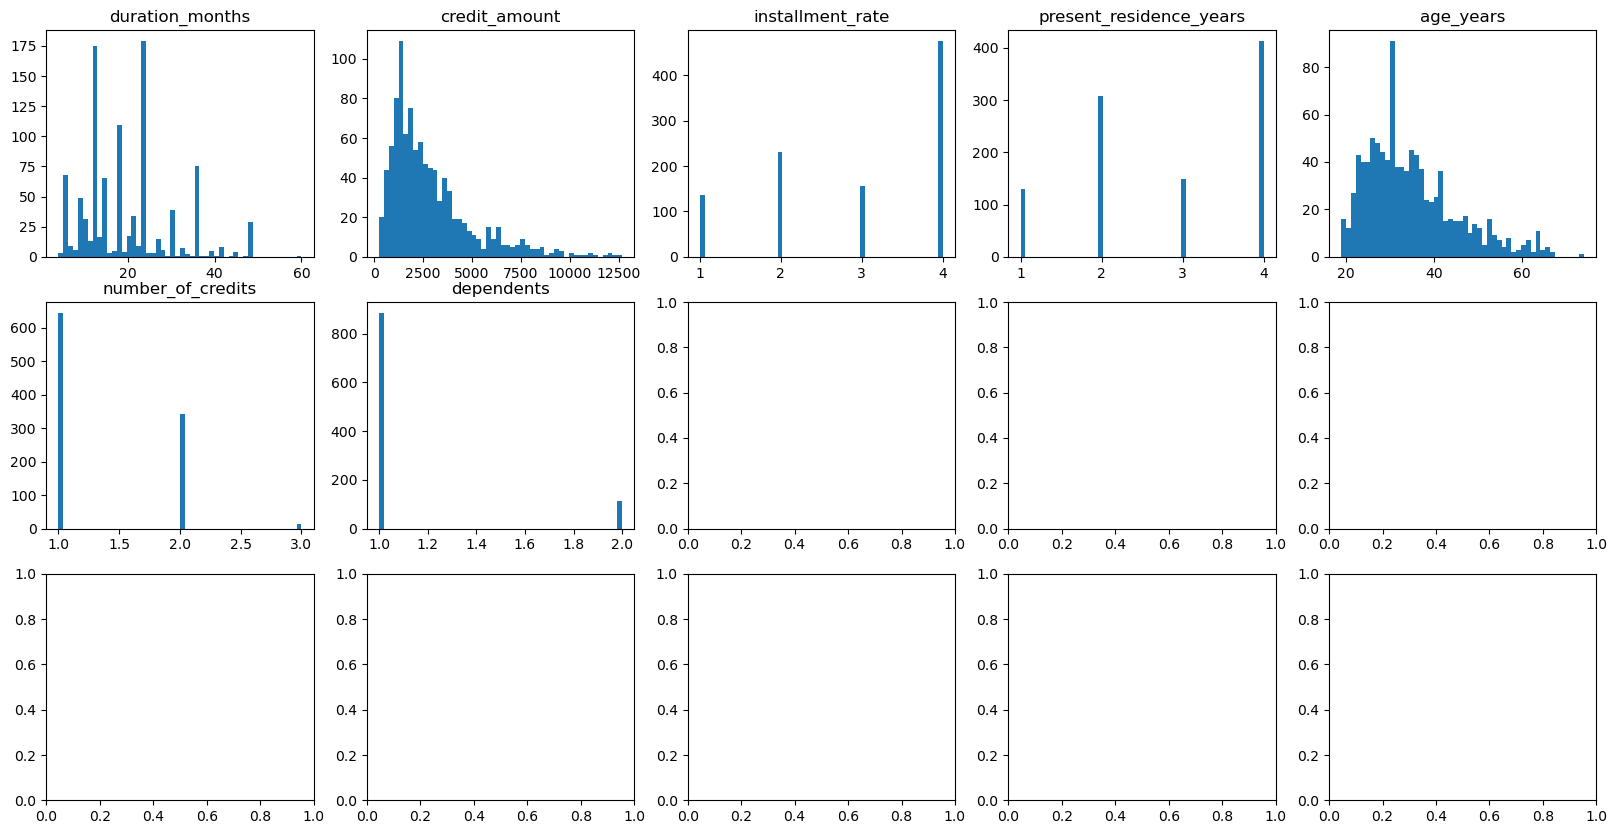

In [60]:
# Visualisation de la distribution des variables 
fig, axs = plt.subplots(3,5, figsize=(20,10))
axs=axs.ravel()
for i , column in enumerate(df.select_dtypes(include=["number"]).columns):
    axs[i].hist(df[column], bins=50)
    axs[i].set_title(column)
plt.show()
    


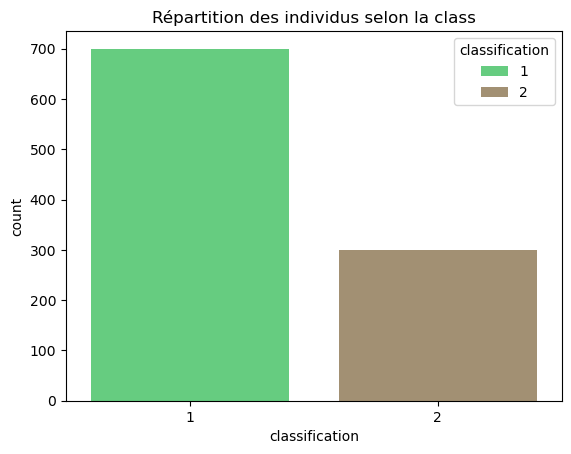

In [61]:
# Diagramme en bar pour la variable categorielle 
sns.countplot(x='classification',data=df, palette='terrain', hue='classification')
plt.title("Répartition des individus selon la class")
plt.show();

In [62]:
# Proportion de nombre de crédit demander 
df['number_of_credits'].value_counts()

number_of_credits
1    645
2    342
3     13
Name: count, dtype: int64

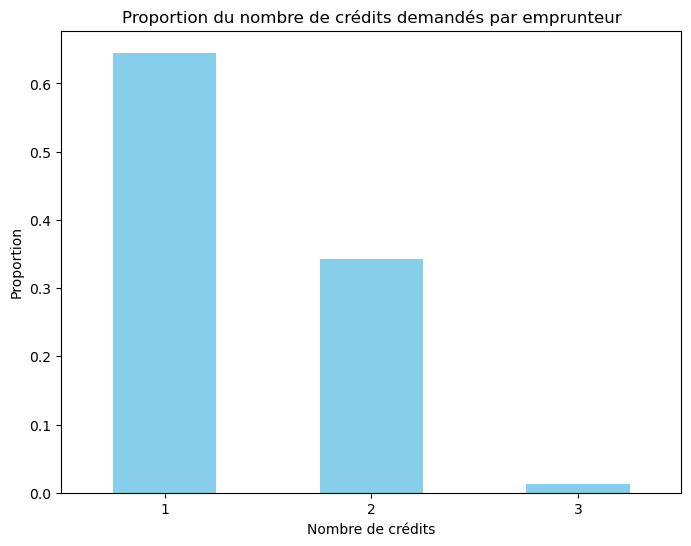

In [63]:
# Calculer la proportion du nombre de crédits demandés
credit_counts = df['number_of_credits'].value_counts(normalize=True)

# Afficher les proportions sous forme de graphique
plt.figure(figsize=(8, 6))
credit_counts.plot(kind='bar', color='skyblue')
plt.title('Proportion du nombre de crédits demandés par emprunteur')
plt.xlabel('Nombre de crédits')
plt.ylabel('Proportion')
plt.xticks(rotation=0)  # Pour afficher les étiquettes sur l'axe des x horizontalement
plt.show()

In [65]:
df.head()

,checking_account_status,duration_months,credit_history,purpose,credit_amount,savings_account,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age_years,other_installment_plans,housing,number_of_credits,job,dependents,telephone,foreign_worker,classification
0,A11,10,A34,A43,1232.100952,A65,A75,4,A93,A101,...,A121,31,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951.000000,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096.000000,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,17,A32,A42,2126.322021,A61,A74,2,A93,A103,...,A122,35,A143,A153,2,A173,1,A191,A201,1
4,A11,23,A33,A40,2421.114258,A61,A73,3,A93,A101,...,A124,52,A143,A153,2,A173,1,A191,A201,2


In [70]:
# Encodage des variables categorielles
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Identifier les variables catégorielles
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
    

In [72]:
df.head()

,checking_account_status,duration_months,credit_history,purpose,credit_amount,savings_account,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age_years,other_installment_plans,housing,number_of_credits,job,dependents,telephone,foreign_worker,classification
0,0,10,4,4,1232.100952,4,4,4,2,0,...,0,31,2,1,2,2,1,1,0,0
1,1,48,2,4,5951.000000,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,1
2,3,12,4,7,2096.000000,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,0
3,0,17,2,3,2126.322021,0,3,2,2,2,...,1,35,2,2,2,2,1,0,0,0
4,0,23,3,0,2421.114258,0,2,3,2,0,...,3,52,2,2,2,2,1,0,0,1


In [74]:
df['foreign_worker'].unique()

array([0, 1])

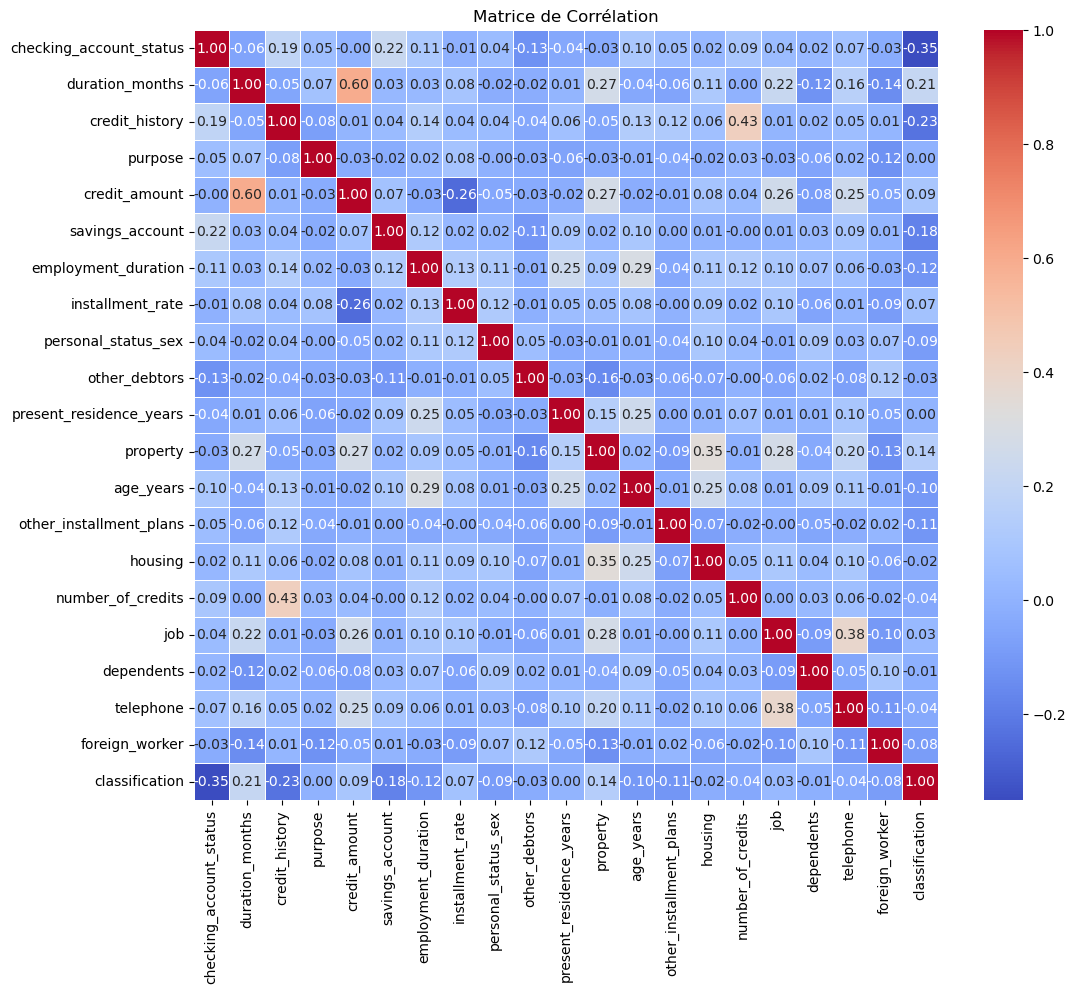

In [76]:
# Etude de la corrélation entre les variables 

# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Afficher la matrice de corrélation sous forme de carte thermique
plt.figure(figsize=(12, 10))  # Taille de la figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Matrice de Corrélation')
plt.show()

In [78]:
# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Transformer la matrice de corrélation en une série unidimensionnelle (en empilant les valeurs)
corr_series = corr_matrix.stack()

# Supprimer les corrélations redondantes (la diagonale principale) en filtrant celles où i == j
corr_series = corr_series[corr_series != 1]

# Trier les corrélations par ordre croissant
sorted_corr = corr_series.sort_values()

# Afficher les corrélations triées
print(sorted_corr)


checking_account_status  classification            -0.350847
classification           checking_account_status   -0.350847
credit_amount            installment_rate          -0.255860
installment_rate         credit_amount             -0.255860
credit_history           classification            -0.228785
                                                      ...   
job                      telephone                  0.383022
number_of_credits        credit_history             0.433138
credit_history           number_of_credits          0.433138
credit_amount            duration_months            0.597635
duration_months          credit_amount              0.597635
Length: 420, dtype: float64


In [80]:
# Filtrer les paires avec une corrélation >= 0.5
high_corr = corr_series[corr_series >= 0.5]

# Afficher les paires de variables ayant une corrélation élevée
print(high_corr)


duration_months  credit_amount      0.597635
credit_amount    duration_months    0.597635
dtype: float64


In [82]:
# Calculer la matrice de corrélation
corr_matrix = df.corr()

# Afficher les corrélations avec la variable cible "classification"
corr_with_target = corr_matrix['classification'].sort_values(ascending=False)

# Sélectionner les variables ayant une forte corrélation (par exemple > 0.3 ou < -0.3)
important_features = corr_with_target[abs(corr_with_target) > 0.2]
print(important_features)


classification             1.000000
duration_months            0.212776
credit_history            -0.228785
checking_account_status   -0.350847
Name: classification, dtype: float64


 <span style="color:blue"><a> [Aller la selection objectifs](#section) </a></span>

# <span><a id="section6">6) Selection des variables pour la prédiction de la variable cible</a></span>

In [86]:
from sklearn.ensemble import RandomForestClassifier


# Séparer les variables indépendantes (X) et la cible (y)
X = df.drop('classification', axis=1)
Y = df['classification']

# Instancier et entraîner un modèle Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, Y)

# Extraire l'importance des variables
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Afficher les variables les plus importantes
print(feature_importances)


                         importance
credit_amount              0.124897
checking_account_status    0.115917
age_years                  0.103497
duration_months            0.098816
credit_history             0.061412
purpose                    0.059960
employment_duration        0.053107
savings_account            0.048295
property                   0.047862
present_residence_years    0.042652
installment_rate           0.042100
personal_status_sex        0.037501
job                        0.033429
other_installment_plans    0.026784
housing                    0.026695
other_debtors              0.020423
number_of_credits          0.020219
telephone                  0.019918
dependents                 0.012206
foreign_worker             0.004310


In [88]:
from sklearn.feature_selection import SelectKBest, chi2

# Sélectionner les k meilleures caractéristiques
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X, Y)

# Afficher les caractéristiques sélectionnées
selected_features = X.columns[selector.get_support()]
print(selected_features)


Index(['checking_account_status', 'duration_months', 'credit_history',
       'credit_amount', 'savings_account', 'employment_duration', 'property',
       'age_years', 'other_installment_plans', 'foreign_worker'],
      dtype='object')


<span style="color:blue"><a> [Aller la section objectifs](#section) </a></span>

# <span> <a id="section7">7) Division du jeu de données en données d'entrenements et de tests </a> </span>

In [92]:
from sklearn.preprocessing import StandardScaler


# Séparation des données en entraînement et test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Normalisation des données avec StandardScaler
scaler = StandardScaler()

# Ajuster sur les données d'entraînement et les transformer
X_train = scaler.fit_transform(X_train)

# Transformer les données de test
X_test = scaler.transform(X_test)
X_train

array([[ 1.13448887,  0.36325689,  0.40316477, ..., -0.33597259,
         1.16486152, -0.20029696],
       [ 1.13448887, -0.79168553, -0.49848168, ..., -0.33597259,
         1.16486152, -0.20029696],
       [-1.27200268,  0.9407281 , -0.49848168, ..., -0.33597259,
         1.16486152, -0.20029696],
       ...,
       [ 1.13448887,  0.36325689,  1.30481122, ..., -0.33597259,
        -0.85847114, -0.20029696],
       [-0.46983883, -0.79168553, -0.49848168, ..., -0.33597259,
         1.16486152, -0.20029696],
       [ 1.13448887, -1.36915674,  0.40316477, ..., -0.33597259,
        -0.85847114, -0.20029696]])

<span style="color:blue"><a> [Aller la section objectifs](#section) </a></span>

# <span> <a id="section8">8) Création et entrainement du modèle pour faire la prédiction </a></span>

In [96]:
from sklearn.linear_model import LogisticRegression

# Instancier et entraîner un modèle de régression logistique
model = LogisticRegression(random_state=42)
model.fit(X_train, Y_train)

# Prédire
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

 <span style="color:blue"><a> [Aller la selection objectifs](#section) </a></span>

# <span> <a id="section9">9) Evaluation de la performance du modèle</a> </span>

In [100]:
# accuracy score 
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.75

In [102]:
from sklearn.metrics import confusion_matrix

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(Y_test, y_pred)

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(conf_matrix)


Matrice de confusion :
[[184  25]
 [ 50  41]]


In [104]:
from sklearn.metrics import classification_report
from prettytable import PrettyTable

# Calculer le rapport de classification
report_dict = classification_report(Y_test, y_pred, target_names=["Classe 0", "Classe 1"], output_dict=True)

# Créer une table pour afficher le rapport
table = PrettyTable()
table.field_names = ["Classe", "Precision", "Recall", "F1-Score", "Support"]

for label, metrics in report_dict.items():
    if label not in ["accuracy", "macro avg", "weighted avg"]:
        table.add_row([label, 
                       f"{metrics['precision']:.2f}", 
                       f"{metrics['recall']:.2f}", 
                       f"{metrics['f1-score']:.2f}", 
                       int(metrics['support'])])

# Ajouter la ligne de précision globale
table.add_row(["Accuracy", "-", "-", f"{report_dict['accuracy']:.2f}", "-"])

# Afficher la table
print(table)


+----------+-----------+--------+----------+---------+
|  Classe  | Precision | Recall | F1-Score | Support |
+----------+-----------+--------+----------+---------+
| Classe 0 |    0.79   |  0.88  |   0.83   |   209   |
| Classe 1 |    0.62   |  0.45  |   0.52   |    91   |
| Accuracy |     -     |   -    |   0.75   |    -    |
+----------+-----------+--------+----------+---------+


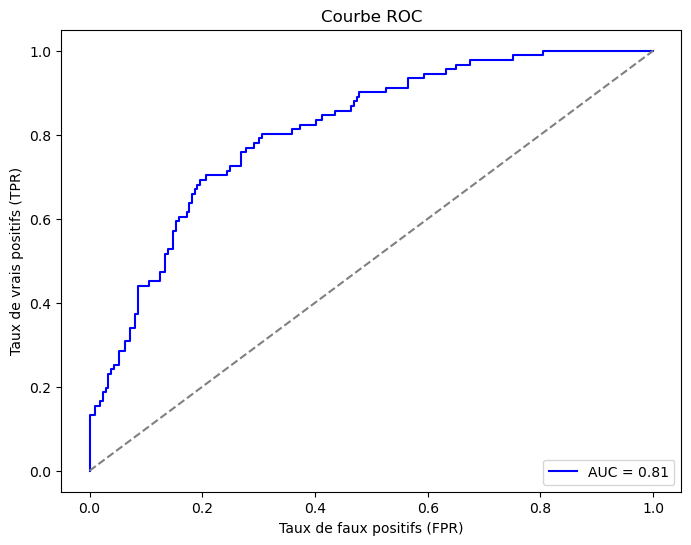

In [106]:
from sklearn.metrics import roc_curve, auc

# Prédictions des probabilités
y_probs = model.predict_proba(X_test)[:, 1]

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Tracé de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonale
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()


 <span style="color:blue"><a> [Aller la selection objectifs](#section) </a></span>

# <span> <a id="section10"> 10) Exportation du modèle pour la mise en production </span>

In [110]:
import joblib  # pour sauvegarder le modèle

# Sauvegarder le modèle entraîné
joblib.dump(model, open("logistic_regression_model.pkl","wb"))
joblib.dump(scaler,open("scaling.pkl","wb"))

 <span style="color:blue"><a> [Aller la selection objectifs](#section) </a></span>